In [1]:
# Colin Nordquist
# CS6140 Midterm


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
import pandas as pd

target_url = ("https://rattle.togaware.com/weatherAUS.csv")
weather = pd.read_csv(target_url)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,195647.000000,195849.000000,193292.000000,96716.000000,88211.000000,183657.000000,195074.000000,191852.000000,194602.000000,190792.000000,176742.000000,176752.000000,114702.000000,108659.000000,195604.000000,191800.000000,193292.000000
mean,12.037551,23.198438,2.273539,5.512777,7.628150,40.068176,14.020659,18.626123,68.695435,51.091864,1017.773892,1015.349796,4.593695,4.602398,16.880649,21.671544,2.273577
std,6.438164,7.151668,8.392070,4.261882,3.767403,13.613287,8.906430,8.758763,19.529563,21.067199,7.067793,7.017653,2.896669,2.751591,6.543506,6.997536,8.391993
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.400000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.100000,1010.500000,1.000000,2.000000,12.200000,16.600000,0.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.600000,21.100000,0.000000
75%,16.700000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.600000,1020.200000,7.000000,7.000000,21.500000,26.400000,0.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


In [4]:
#drop column w
weather = weather.drop(columns="RISK_MM")

In [5]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


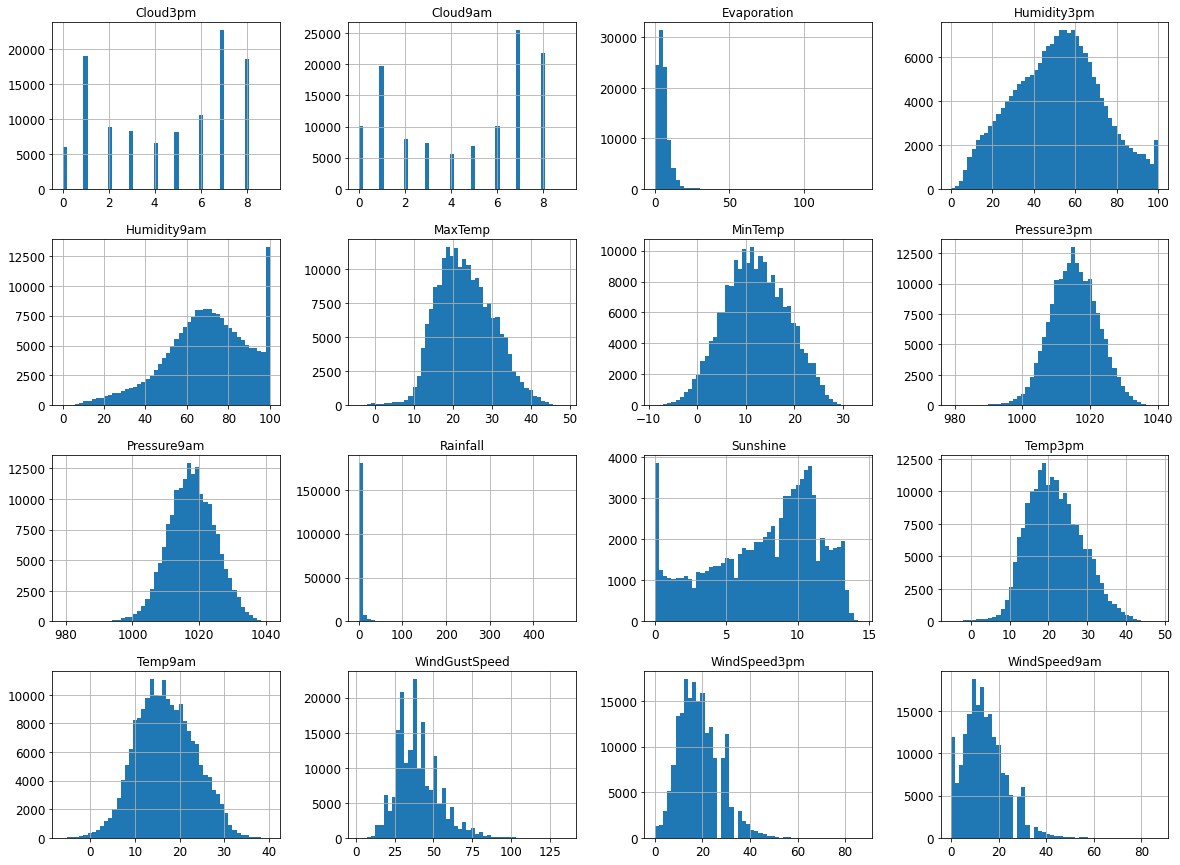

In [6]:
# visualize the data

import matplotlib.pyplot as plt
weather.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
weather.isnull().sum(axis = 0).sort_values()

Date                  0
Location              0
MaxTemp            2807
MinTemp            3009
Temp9am            3052
WindSpeed9am       3582
Humidity9am        4054
RainTomorrow       5364
Rainfall           5364
RainToday          5364
WindSpeed3pm       6804
Temp3pm            6856
Humidity3pm        7864
WindDir3pm         8187
WindGustSpeed     14999
WindGustDir       15108
WindDir9am        15587
Pressure3pm       21904
Pressure9am       21914
Cloud9am          83954
Cloud3pm          89997
Evaporation      101940
Sunshine         110445
dtype: int64

In [8]:
# Drop categories with too many null values
columns = ["Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"]
weather = weather.drop(columns=columns)

# convert to binary
weather["RainToday"] = weather["RainToday"].map({"No":0, "Yes":1})
weather["RainTomorrow"] = weather["RainTomorrow"].map({"No":0, "Yes":1})

In [9]:
# Separating categorical categories from numerical categories

categorical_columns = []
numeric_columns = []
for c in weather.columns:
    if weather[c].map(type).eq(str).any():
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

weather_numeric = weather[numeric_columns]
weather_categorical = weather[categorical_columns]

In [10]:
# replace nulls with median vals
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit_transform(weather_numeric)
weather_tr=pd.DataFrame(imputer.transform(weather_numeric), columns=weather_numeric.columns)
weather_numeric.isnull().sum(axis = 0)

MinTemp           3009
MaxTemp           2807
Rainfall          5364
WindGustSpeed    14999
WindSpeed9am      3582
WindSpeed3pm      6804
Humidity9am       4054
Humidity3pm       7864
Pressure9am      21914
Pressure3pm      21904
Temp9am           3052
Temp3pm           6856
RainToday         5364
RainTomorrow      5364
dtype: int64

In [11]:
# recombine
weather = weather_categorical.join(weather_tr)
#date -> month
weather["Month"] = pd.to_datetime(weather["Date"]).dt.month
weather = weather.drop(columns="Date")
# drop nulls
weather = weather.dropna()
weather.isnull().sum(axis=0)

Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [12]:
# Turn categorical columns into numerical binary

weather = pd.get_dummies(weather, columns=["WindGustDir", "WindDir9am", "WindDir3pm"])
weather = pd.get_dummies(weather, columns=["Location"])
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172440 entries, 0 to 198655
Columns: 110 entries, MinTemp to Location_Woomera
dtypes: float64(14), int64(1), uint8(95)
memory usage: 36.7 MB


In [13]:
# Normalization using minmax scaling

from sklearn.preprocessing import minmax_scale


def apply_minmax_scale(dataset, features):
    for feature in features:
        dataset[feature] = minmax_scale(dataset[[feature]])
numerical_features = ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                     "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", 
                     "Pressure3pm", "Temp9am", "Temp3pm"]
apply_minmax_scale(weather, numerical_features)
weather.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=110)

In [14]:
# train/test split

from sklearn.model_selection import train_test_split
 
y = weather["RainTomorrow"]
X = weather.drop(columns = "RainTomorrow")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

def displayScores(classifier, X_train, y_train):
    y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=3)
    print(classifier)
    print("Precision: ", precision_score(y_train, y_train_pred))
    print("Recall :", recall_score(y_train, y_train_pred))
    print("F1: ", f1_score(y_train, y_train_pred))
    print("\n")

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=37)
forest_clf.fit(X_train, y_train)

# SGD
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=37)
sgd_clf.fit(X_train, y_train)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

print("Performance on training set: ")
displayScores(forest_clf, X_train, y_train)
displayScores(sgd_clf, X_train, y_train)
displayScores(log_clf, X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance on training set: 
RandomForestClassifier(random_state=37)
Precision:  0.7663379213178715
Recall : 0.4820698118352877
F1:  0.5918392969240427


SGDClassifier(random_state=37)
Precision:  0.6411640819452422
Recall : 0.5707662939732752
F1:  0.6039205785287912




/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()
Precision:  0.728025701521008
Recall : 0.49437551131715296
F1:  0.5888706173741803




In [17]:
print("Performance on test set: ")
displayScores(forest_clf, X_test, y_test)
displayScores(sgd_clf, X_test, y_test)
displayScores(log_clf, X_test, y_test)

Performance on test set: 
RandomForestClassifier(random_state=37)
Precision:  0.7665758401453224
Recall : 0.46013356957884693
F1:  0.5750787837492548


SGDClassifier(random_state=37)
Precision:  0.732379767827529
Recall : 0.48153196129208126
F1:  0.5810377436066114




/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()
Precision:  0.7245084127305899
Recall : 0.4871200763254736
F1:  0.582559087204564




/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Print ROC curve

from sklearn import metrics

def displayROC(probs, X_test, y_test):
    fpr, tpr, thresh = metrics.roc_curve(y_test, probs[:, 1])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

ROC Random Forest


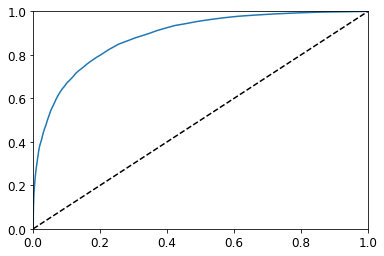

ROC Logistic Regression


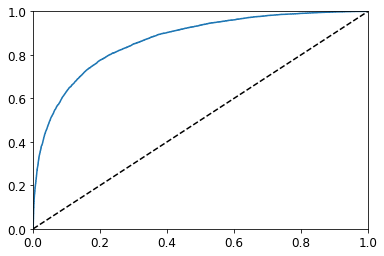

In [19]:
prob_forest = forest_clf.predict_proba(X_test)
prob_logistic = log_clf.predict_proba(X_test)

print("ROC Random Forest")
displayROC(prob_forest, X_test, y_test)
print("ROC Logistic Regression")
displayROC(prob_logistic, X_test, y_test)